# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

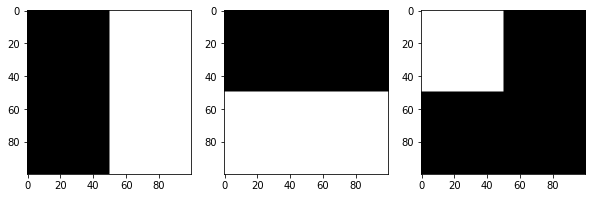

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


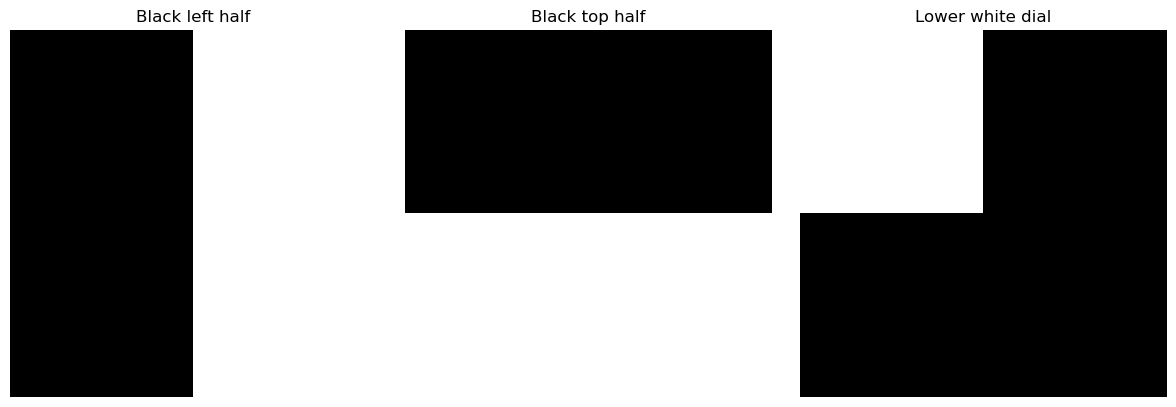

In [11]:
# solution

image1 = np.zeros((100, 100))
image1[:, 50:] = 1

image2 = np.zeros((100, 100))
image2[50:, :] = 1

image3 = np.zeros((100, 100))
image3[:50, :50] = 1

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image1, cmap='gray')
axes[0].set_title("Black left half")
axes[0].axis('off')

axes[1].imshow(image2, cmap='gray')
axes[1].set_title("Black top half")
axes[1].axis('off')

axes[2].imshow(image3, cmap='gray')
axes[2].set_title("Lower white dial")
axes[2].axis('off')

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

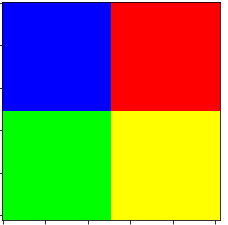
*Hint: Remember channels and color spaces*

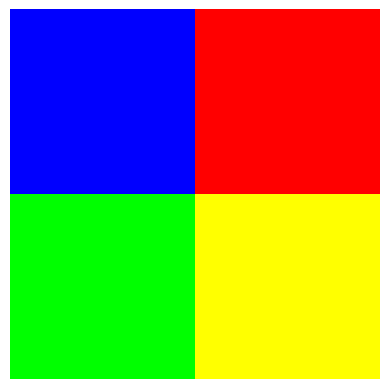

In [18]:
# solution

height, width = 100, 100

image = np.zeros((height, width, 3), dtype=np.uint8)

image[:50, :50] = [0, 0, 255]

image[:50, 50:] = [255, 0, 0]

image[50:, :50] = [0, 255, 0]

image[50:, 50:] = [255, 255, 0]

plt.imshow(image)
plt.axis('off')
plt.show()




### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

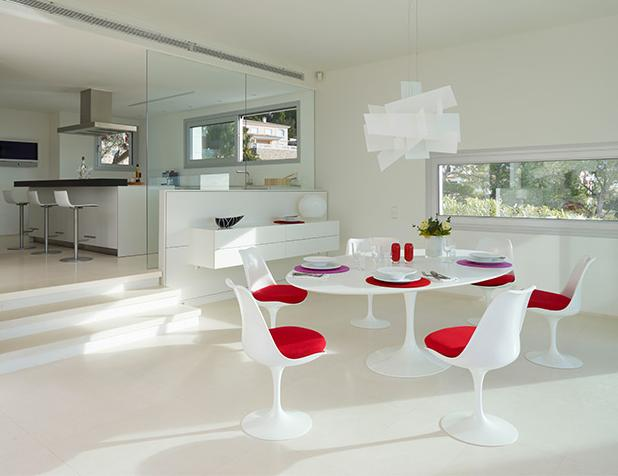

*   Extract individual channels and plot them using matplotlib subplot.



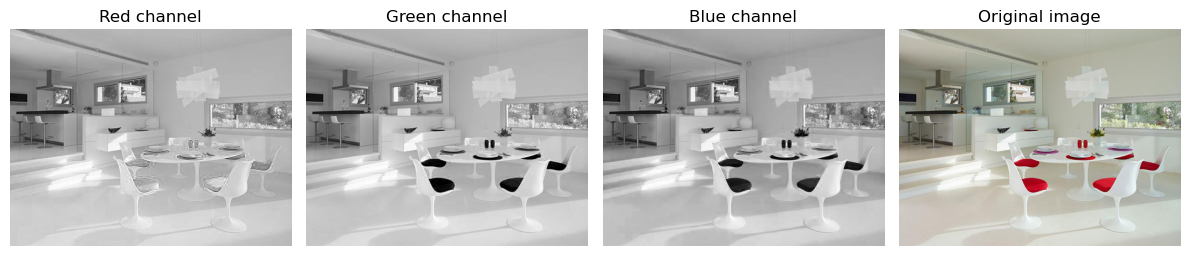

In [19]:
# solution

image = io.imread('images/sillas.jpg')

# Extracting individual channels

r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]

fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(r, cmap='gray')

axes[0].set_title("Red channel")

axes[0].axis('off')

axes[1].imshow(g, cmap='gray')

axes[1].set_title("Green channel")

axes[1].axis('off')

axes[2].imshow(b, cmap='gray')

axes[2].set_title("Blue channel")

axes[2].axis('off')

axes[3].imshow(image)

axes[3].set_title("Original image")

axes[3].axis('off')

plt.tight_layout()

plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

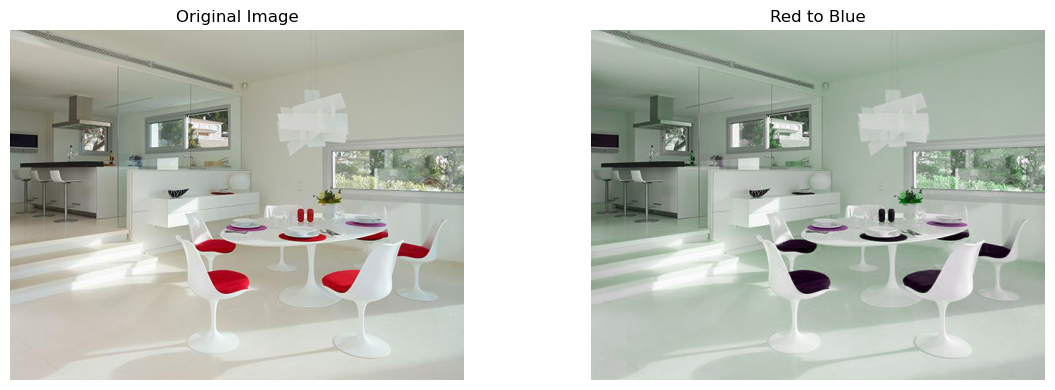

In [22]:
# solution

image = io.imread('images/sillas.jpg')

modified_image = image.copy()

modified_image[:, :, 0] = image[:, :, 2]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(modified_image)
axes[1].set_title("Red to Blue")
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

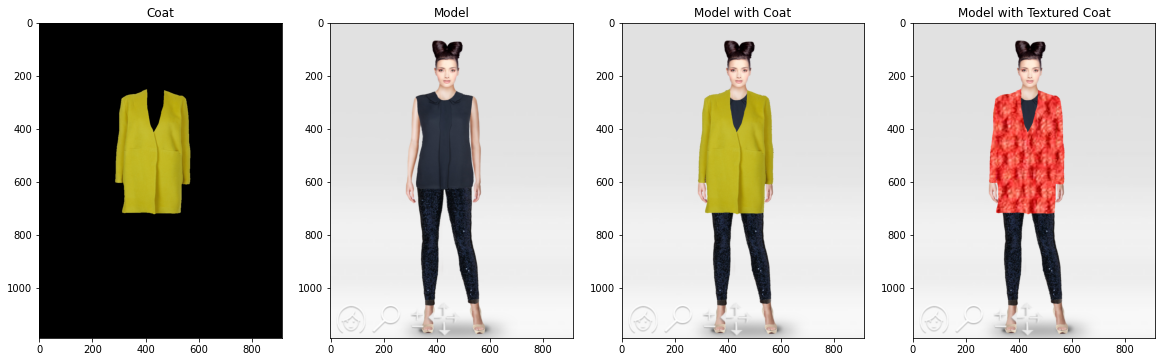

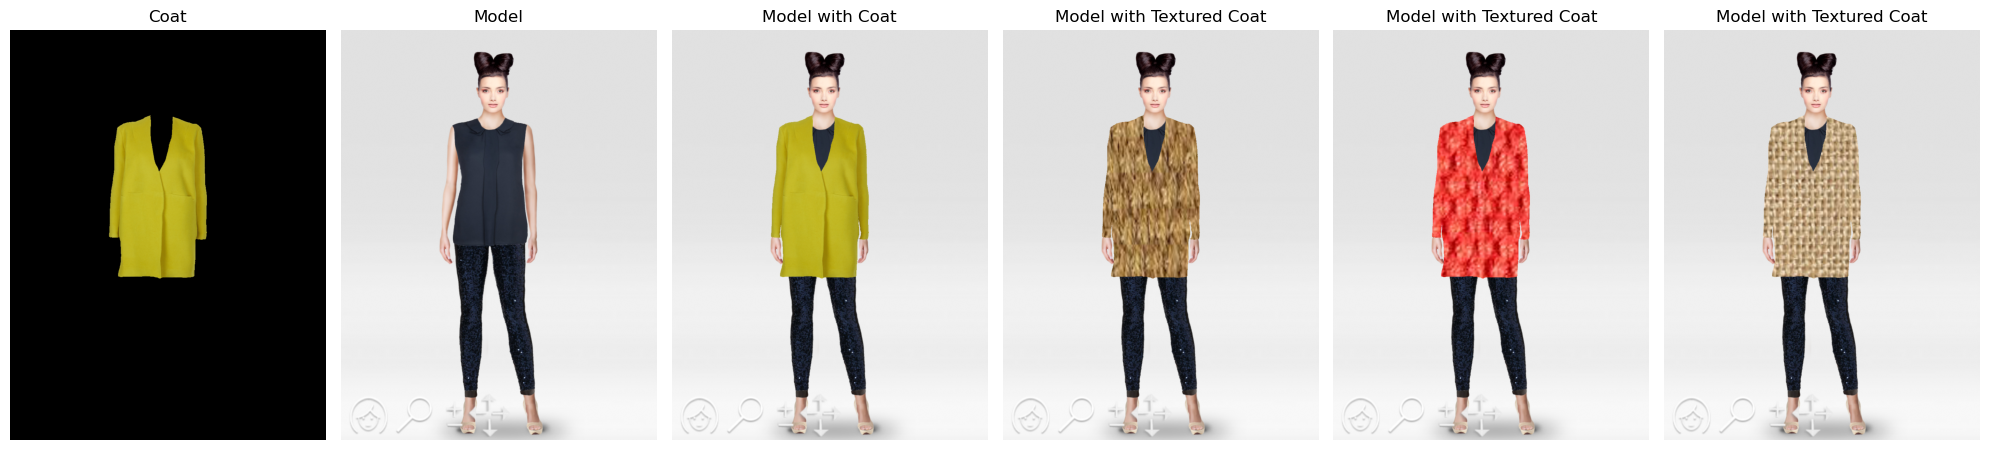

In [34]:
# solution

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform

model_image = io.imread('images/model.png')
coat_image = io.imread('images/coat.png')
texture_image = io.imread('images/texture.png')
texture_image2 = io.imread('images/texture2.png')
texture_image3 = io.imread('images/texture3.jpg')

if model_image.shape[2] == 4:
    model_image = model_image[:, :, :3]

coat_image_resized = transform.resize(coat_image, (model_image.shape[0], model_image.shape[1]), anti_aliasing=True)
texture_image_resized = transform.resize(texture_image, (model_image.shape[0], model_image.shape[1]), anti_aliasing=True)
texture2_image_resized = transform.resize(texture_image2, (model_image.shape[0], model_image.shape[1]), anti_aliasing=True)
texture3_image_resized = transform.resize(texture_image3, (model_image.shape[0], model_image.shape[1]), anti_aliasing=True)

if coat_image_resized.shape[2] == 4:
    coat_image_resized = coat_image_resized[:, :, :3]
if texture_image_resized.shape[2] == 4:
    texture_image_resized = texture_image_resized[:, :, :3]
if texture2_image_resized.shape[2] == 4:
    texture2_image_resized = texture2_image_resized[:, :, :3]
if texture3_image_resized.shape[2] == 4:
    texture3_image_resized = texture3_image_resized[:, :, :3]

mask = coat_image_resized[:, :, 0] > 0.5 
mask = np.stack([mask] * 3, axis=-1)

model_with_coat = model_image / 255.0 * ~mask + coat_image_resized * mask

model_with_texture = model_image / 255.0 * ~mask + texture_image_resized * mask
model_with_texture2 = model_image / 255.0 * ~mask + texture2_image_resized * mask
model_with_texture3 = model_image / 255.0 * ~mask + texture3_image_resized * mask

fig, axes = plt.subplots(1, 6, figsize=(20, 5))

axes[0].imshow(coat_image_resized)
axes[0].set_title("Coat")
axes[0].axis('off')

axes[1].imshow(model_image / 255.0)
axes[1].set_title("Model")
axes[1].axis('off')

axes[2].imshow(model_with_coat)
axes[2].set_title("Model with Coat")
axes[2].axis('off')

axes[3].imshow(model_with_texture)
axes[3].set_title("Model with Textured Coat")
axes[3].axis('off')

axes[4].imshow(model_with_texture2)
axes[4].set_title("Model with Textured Coat")
axes[4].axis('off')

axes[5].imshow(model_with_texture3)
axes[5].set_title("Model with Textured Coat")
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




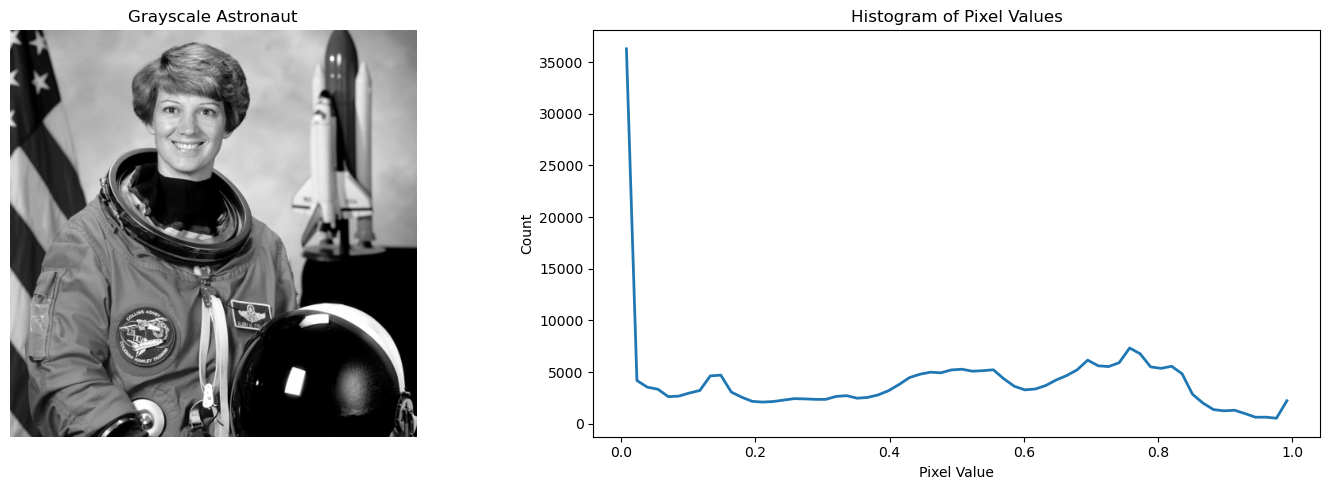

In [37]:
# solution

from skimage import data, color, exposure

astronaut = data.astronaut()
gray_astronaut = color.rgb2gray(astronaut)

hist, bin_centers = exposure.histogram(gray_astronaut, nbins=64)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(gray_astronaut, cmap='gray')
axes[0].set_title('Grayscale Astronaut')
axes[0].axis('off')

axes[1].plot(bin_centers, hist, lw=2)
axes[1].set_title('Histogram of Pixel Values')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

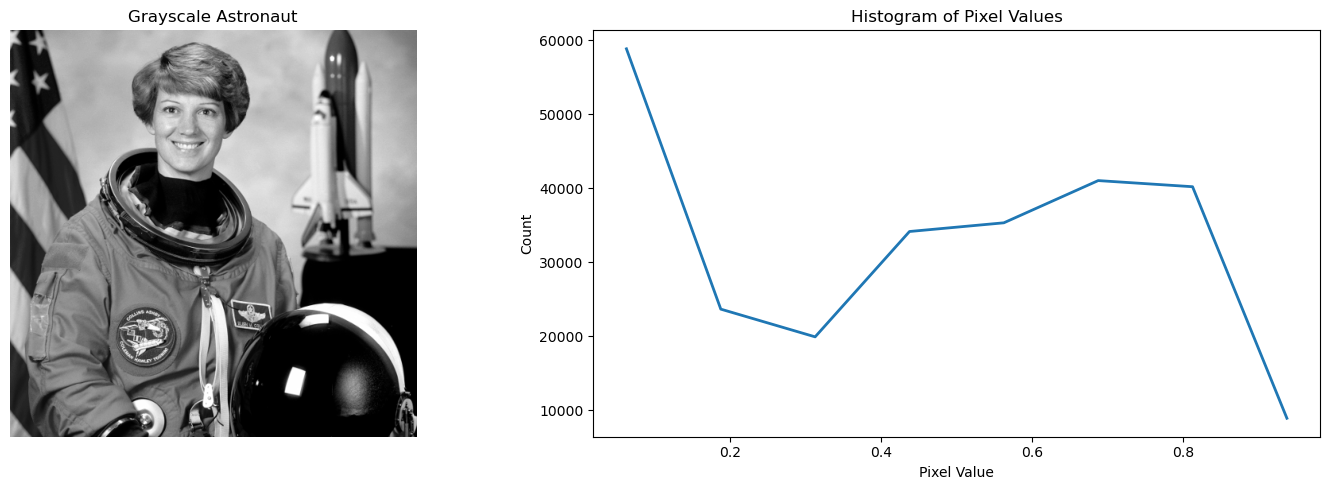

In [38]:
# solution

astronaut = data.astronaut()
gray_astronaut = color.rgb2gray(astronaut)

hist, bin_centers = exposure.histogram(gray_astronaut, nbins=8)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(gray_astronaut, cmap='gray')

axes[0].set_title('Grayscale Astronaut')

axes[0].axis('off')

axes[1].plot(bin_centers, hist, lw=2)

axes[1].set_title('Histogram of Pixel Values')

axes[1].set_xlabel('Pixel Value')

axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()







*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?

